<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/mmd_metric/MMD_Russian_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repository cloning

In [1]:
!git clone https://github.com/Derinhelm/parser_stat.git

Cloning into 'parser_stat'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 137 (delta 7), reused 2 (delta 2), pack-reused 122 (from 1)
Receiving objects: 100% (137/137), 30.85 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (67/67), done.
Updating files: 100% (17/17), done.


In [2]:
import sys
sys.path.append('/content/parser_stat')

In [3]:
!mkdir pics

# Data getting

In [4]:
from data_classes import ConllEntry, Sentence

In [5]:
import pickle

In [6]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [7]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [8]:
treebank_names = ['taiga', 'poetry', 'gsd', 'pud', 'syntagrus']

# Parsing result getting

In [9]:
import pandas as pd

In [10]:
parser_names = ["natasha", "udpipe", "spacy", "deeppavlov", "stanza"]

In [11]:
parser_res = {}
for p in parser_names:
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

In [12]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [13]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][95].tokens]

[('1', '4', 'obl'),
 ('2', '4', 'case'),
 ('3', '4', 'amod'),
 ('4', '0', 'root'),
 ('5', '4', 'nsubj'),
 ('6', '5', 'flat:foreign'),
 ('7', '5', 'flat:foreign'),
 ('8', '5', 'flat:foreign'),
 ('9', '5', 'flat:foreign'),
 ('10', '4', 'punct'),
 ('1', '2', 'punct'),
 ('2', '4', 'parataxis'),
 ('3', '2', 'punct'),
 ('4', '0', 'root'),
 ('5', '4', 'xcomp'),
 ('6', '5', 'obj'),
 ('7', '8', 'amod'),
 ('8', '6', 'nmod'),
 ('9', '4', 'punct')]

In [14]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [15]:
parser_res['stanza']['syntagrus'][95].sent_id

'2003Armeniya.xml_96'

In [16]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

taiga natasha 95
taiga udpipe 42
taiga spacy 69
taiga deeppavlov 67
taiga stanza 69
poetry natasha 148
poetry udpipe 43
poetry spacy 24
poetry deeppavlov 50
poetry stanza 65
gsd natasha 83
gsd udpipe 7
gsd spacy 14
gsd deeppavlov 18
gsd stanza 5
pud natasha 98
pud udpipe 7
pud spacy 18
pud deeppavlov 3
pud stanza 4
syntagrus natasha 1073
syntagrus udpipe 57
syntagrus spacy 220
syntagrus deeppavlov 131
syntagrus stanza 190


In [17]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [18]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [19]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '3', 'punct'),
 ('1', '3', 'amod'),
 ('2', '3', 'amod'),
 ('3', '0', 'root'),
 ('4', '5', 'punct'),
 ('5', '3', 'parataxis'),
 ('6', '5', 'flat'),
 ('7', '5', 'punct'),
 ('8', '9', 'punct'),
 ('9', '3', 'conj'),
 ('10', '9', 'nmod'),
 ('11', '12', 'punct'),
 ('12', '10', 'parataxis'),
 ('13',

In [20]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [21]:
for t in treebank_names:
  for p in parser_names:
    for s in parser_res[p][t]:
      shift_token_id(s)

In [22]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Creating token start-end pairs

be_edges - set of dependency tree edges in begin-end format

In [23]:
def create_sent_be_nodes(sent, text_transform):
    token_begin_end = []
    sent_text = text_transform(sent.text)
    original_sent_text = text_transform(sent.text)
    del_prefix_len = 0
    tokens = [t for t in sent.tokens if '.' not in t.id]
    for t_i, t in enumerate(tokens):
        token_text = text_transform(t.form)
        t_start = sent_text.find(token_text)
        if t_start == -1:
            print("Error:", sent.sent_id, f"sent_text:{sent_text}, t:{token_text}", t_i)
        else:
            b, e = (del_prefix_len + t_start,
                                  del_prefix_len + t_start + len(token_text))
            token_begin_end.append((t, (b, e)))
            del_prefix_len += t_start + len(token_text)
            sent_text = sent_text[t_start + len(token_text):]
            assert text_transform(original_sent_text[b:e]) == text_transform(tokens[t_i].form)
    sent_text = text_transform(sent.text)
    return token_begin_end

In [24]:
def create_sent_be_edges(sent_be_tokens):
    sent_be_res = {}
    for t_id, (t, t_be) in enumerate(sent_be_tokens): # ellipsis are deleted, so index in sent_be_tokens = token_id
      parent_id = t.parent_id
      if parent_id == '0': # root
        parent_be = (-1, -1)
      else:
        _, parent_be = sent_be_tokens[int(parent_id) - 1]
      sent_be_res[t_be] = (parent_be, t.relation)
    return sent_be_res

In [25]:
from collections import OrderedDict

In [26]:
be_treebanks = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [27]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

{(0, 2): ((16, 20), 'nsubj'),

 (3, 15): ((16, 20), 'advmod'),

 (16, 20): ((-1, -1), 'root'),

 (21, 24): ((25, 34), 'det'),

 (25, 34): ((16, 20), 'obj'),

 (35, 43): ((16, 20), 'advmod'),

 (43, 44): ((16, 20), 'punct')}


In [28]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [29]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_96']

{(0, 3): ((11, 15), 'obl'),
 (4, 5): ((11, 15), 'case'),
 (6, 10): ((11, 15), 'amod'),
 (11, 15): ((-1, -1), 'root'),
 (16, 24): ((11, 15), 'nsubj'),
 (25, 33): ((16, 24), 'flat:foreign'),
 (34, 42): ((16, 24), 'flat:foreign'),
 (43, 50): ((16, 24), 'flat:foreign'),
 (51, 54): ((16, 24), 'flat:foreign'),
 (54, 55): ((11, 15), 'punct'),
 (56, 57): ((57, 64), 'punct'),
 (57, 64): ((66, 72), 'parataxis'),
 (64, 65): ((57, 64), 'punct'),
 (66, 72): ((-1, -1), 'root'),
 (73, 86): ((66, 72), 'xcomp'),
 (87, 93): ((73, 86), 'obj'),
 (94, 105): ((106, 111), 'amod'),
 (106, 111): ((87, 93), 'nmod'),
 (111, 112): ((66, 72), 'punct')}

((0, 2), ((16, 20), 'nsubj')),

((3, 9), ((16, 20), 'obl')),

((9, 10), ((10, 15), 'punct')),

((10, 15), ((3, 9), 'conj')),

((16, 20), ((-1, -1), 'root')),

((21, 24), ((25, 34), 'det')),

((25, 34), ((16, 20), 'obj')),

((35, 43), ((16, 20), 'advmod')),

((43, 44), ((16, 20), 'punct'))]

# Sentence statistics

In [30]:
import numpy as np
import networkx as nx
from collections import defaultdict

In [ ]:
'''

Предыдущий вариант

 def wl_ker(graphs, h=3):
    feature_maps = [defaultdict(int) for _ in graphs]

    # Инициализация меток
    for i, G in enumerate(graphs):
        for node in G.nodes():
            label = str(G.degree(node))  # Начальная метка — степень узла
            feature_maps[i][label] += 1

    # Итеративное обновление меток
    prev_labels = [defaultdict(str) for _ in graphs]
    for i, G in enumerate(graphs):
        prev_labels[i].update({node: str(G.degree(node)) for node in G.nodes()})

    for _ in range(h):
        new_labels = [defaultdict(str) for _ in graphs]
        for i, G in enumerate(graphs):
            for node in G.nodes():
                neighbor_info = []
                for neighbor in G.neighbors(node):
                    neighbor_label = prev_labels[i][neighbor]
                    edge_label = G[node][neighbor].get('label', '')  # Метка ребра
                    neighbor_info.append(f"{neighbor_label}_{edge_label}")
                neighbor_info_sorted = sorted(neighbor_info)
                if len(neighbor_info_sorted) == 0:
                    neighbor_info_sorted = ['none']
                new_label = f"{prev_labels[i][node]}_{'_'.join(neighbor_info_sorted)}"
                new_labels[i][node] = new_label
                feature_maps[i][new_label] += 1
        prev_labels = new_labels

    # Нормализация гистограмм
    for i in range(len(graphs)):
        total = sum(feature_maps[i].values())
        if total > 0:  # Избегаем деления на ноль
            for key in feature_maps[i]:
                feature_maps[i][key] /= total

    # Вычисление матрицы сходства
    K = np.zeros((len(graphs), len(graphs)))
    for i in range(len(graphs)):
        for j in range(i, len(graphs)):
            # Скалярное произведение с нормализацией
            dot_product = sum(feature_maps[i].get(k, 0) * feature_maps[j].get(k, 0) for k in set(feature_maps[i]) | set(feature_maps[j]))
            norm_i = np.sqrt(sum(feature_maps[i].get(k, 0)**2 for k in feature_maps[i]))
            norm_j = np.sqrt(sum(feature_maps[j].get(k, 0)**2 for k in feature_maps[j]))
            K[i, j] = dot_product / (norm_i * norm_j)

    return K
'''

In [92]:
import numpy as np
from collections import defaultdict

def new_wl_ker1(results, references, h=3):
    assert len(results) == len(references), "Количество результатов и эталонов должно совпадать"

    feature_maps_results = [defaultdict(int) for _ in results]
    feature_maps_refs = [defaultdict(int) for _ in references]

    for i, G in enumerate(results):
        for node in G.nodes():
            label = str(G.degree(node))
            feature_maps_results[i][label] += 1

    for i, G in enumerate(references):
        for node in G.nodes():
            label = str(G.degree(node))
            feature_maps_refs[i][label] += 1

    prev_labels_results = [defaultdict(str) for _ in results]
    for i, G in enumerate(results):
        prev_labels_results[i].update({node: str(G.degree(node)) for node in G.nodes()})

    prev_labels_refs = [defaultdict(str) for _ in references]
    for i, G in enumerate(references):
        prev_labels_refs[i].update({node: str(G.degree(node)) for node in G.nodes()})

    for _ in range(h):
        new_labels_results = [defaultdict(str) for _ in results]
        for i, G in enumerate(results):
            for node in G.nodes():
                neighbor_info = []
                for neighbor in G.neighbors(node):
                    neighbor_label = prev_labels_results[i][neighbor]
                    edge_label = G[node][neighbor].get('label', '')
                    neighbor_info.append(f"{neighbor_label}_{edge_label}")
                neighbor_info_sorted = sorted(neighbor_info)
                if not neighbor_info_sorted:
                    neighbor_info_sorted = ['none']
                new_label = f"{prev_labels_results[i][node]}_{'_'.join(neighbor_info_sorted)}"
                new_labels_results[i][node] = new_label
                feature_maps_results[i][new_label] += 1
        prev_labels_results = new_labels_results

        new_labels_refs = [defaultdict(str) for _ in references]
        for i, G in enumerate(references):
            for node in G.nodes():
                neighbor_info = []
                for neighbor in G.neighbors(node):
                    neighbor_label = prev_labels_refs[i][neighbor]
                    edge_label = G[node][neighbor].get('label', '')
                    neighbor_info.append(f"{neighbor_label}_{edge_label}")
                neighbor_info_sorted = sorted(neighbor_info)
                if not neighbor_info_sorted:
                    neighbor_info_sorted = ['none']
                new_label = f"{prev_labels_refs[i][node]}_{'_'.join(neighbor_info_sorted)}"
                new_labels_refs[i][node] = new_label
                feature_maps_refs[i][new_label] += 1
        prev_labels_refs = new_labels_refs

    for i in range(len(results)):
        total = sum(feature_maps_results[i].values())
        if total > 0:
            for key in feature_maps_results[i]:
                feature_maps_results[i][key] /= total

    for i in range(len(references)):
        total = sum(feature_maps_refs[i].values())
        if total > 0:
            for key in feature_maps_refs[i]:
                feature_maps_refs[i][key] /= total

    similarities = np.zeros(len(results))
    for i in range(len(results)):
        # Скалярное произведение с нормализацией
        dot_product = sum(feature_maps_results[i].get(k, 0) * feature_maps_refs[i].get(k, 0)
                         for k in set(feature_maps_results[i]) | set(feature_maps_refs[i]))
        norm_i = np.sqrt(sum(feature_maps_results[i].get(k, 0)**2 for k in feature_maps_results[i]))
        norm_j = np.sqrt(sum(feature_maps_refs[i].get(k, 0)**2 for k in feature_maps_refs[i]))

        if norm_i * norm_j > 0:
            similarities[i] = dot_product / (norm_i * norm_j)
        else:
            similarities[i] = 0.0

    return similarities

In [35]:
def networkx_formatter(dict_Graph, nx_Graph, show=False):
    for node, value in dict_Graph.items():
        if isinstance(value, tuple) and len(value) == 2:
            head, label = value
            nx_Graph.add_node(node)
            if head != (-1, -1):
                nx_Graph.add_edge(node, head, label=label)
        else:
            print(f"Пропущено значение для узла {value} (некорректная структура)\n")

    if show:
        pos = nx.spring_layout(nx_Graph)
        nx.draw(nx_Graph, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=6, font_weight="bold")

    return nx_Graph

### Оne sentence (example)

In [ ]:
be_treebanks['taiga']['1']

{(0, 3): ((4, 9), 'advmod'),
 (4, 9): ((12, 18), 'obl'),
 (10, 11): ((12, 18), 'case'),
 (12, 18): ((-1, -1), 'root'),
 (19, 22): ((12, 18), 'nmod'),
 (23, 24): ((25, 28), 'cc'),
 (25, 28): ((19, 22), 'conj'),
 (29, 33): ((12, 18), 'cop'),
 (34, 39): ((40, 43), 'advmod'),
 (40, 43): ((44, 50), 'nummod:gov'),
 (44, 50): ((12, 18), 'nsubj'),
 (51, 52): ((81, 86), 'cc'),
 (53, 59): ((81, 86), 'nummod:gov'),
 (60, 66): ((81, 86), 'amod'),
 (67, 80): ((81, 86), 'amod'),
 (81, 86): ((44, 50), 'conj'),
 (86, 87): ((12, 18), 'punct')}

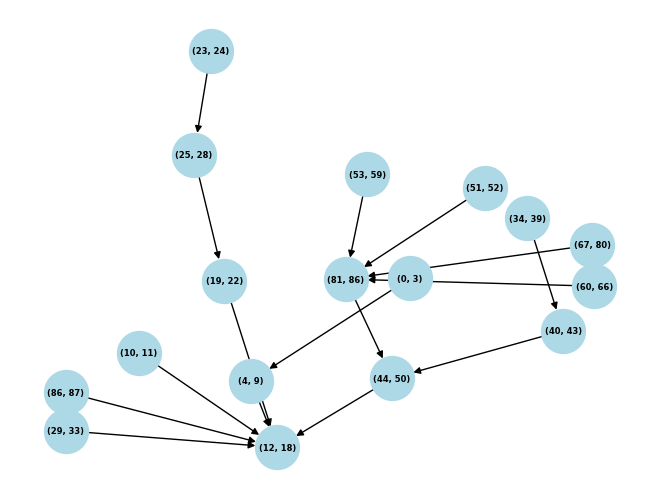

In [ ]:
P = networkx_formatter(be_treebanks['taiga']['1'], nx.DiGraph(), True)

In [ ]:
be_parser_res['stanza']['taiga']['1']

{(0, 3): ((4, 9), 'obl'),
 (4, 9): ((12, 18), 'nmod'),
 (10, 11): ((12, 18), 'case'),
 (12, 18): ((-1, -1), 'root'),
 (19, 22): ((12, 18), 'nmod'),
 (23, 24): ((25, 28), 'cc'),
 (25, 28): ((19, 22), 'conj'),
 (29, 33): ((12, 18), 'cop'),
 (34, 39): ((12, 18), 'nsubj'),
 (40, 43): ((44, 50), 'nummod'),
 (44, 50): ((34, 39), 'obl'),
 (51, 52): ((81, 86), 'cc'),
 (53, 59): ((81, 86), 'nummod:gov'),
 (60, 66): ((81, 86), 'amod'),
 (67, 80): ((81, 86), 'amod'),
 (81, 86): ((44, 50), 'conj'),
 (86, 87): ((12, 18), 'punct')}

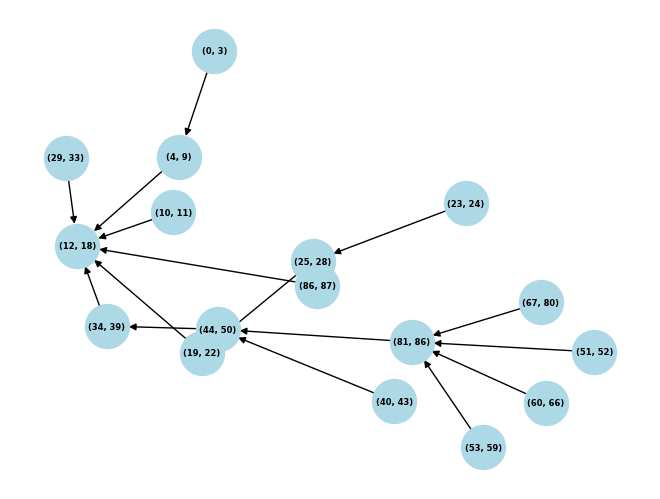

In [ ]:
Q = networkx_formatter(be_parser_res['stanza']['taiga']['1'], nx.DiGraph(), True)

### For parser "Stanza" and dataset "Taiga"

In [ ]:
Graphs_P1 = []
for key, item in be_treebanks['taiga'].items():
    Graphs_P1.append(networkx_formatter(item, nx.DiGraph()))

In [ ]:
Graphs_Q1 = []
for key, item in be_parser_res['stanza']['taiga'].items():
    Graphs_Q1.append(networkx_formatter(item, nx.DiGraph()))

In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=0)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.9651


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=1)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.8778


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=2)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.8060


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=3)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.7517


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=4)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.7102


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=5)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.6774


# Mean values

In [ ]:
similarity_results = {}

for parser_key in be_parser_res.keys():
    similarity_results[parser_key] = {}
    for treebank_key in be_treebanks.keys():
        print(treebank_key)
        Graphs_P1 = []
        for k, item in be_treebanks[treebank_key].items():
            Graphs_P1.append(networkx_formatter(item, nx.DiGraph()))
        Graphs_Q1 = []
        for k, item in be_parser_res[parser_key][treebank_key].items():
            Graphs_Q1.append(networkx_formatter(item, nx.DiGraph()))

        similarity_results[parser_key][treebank_key] = new_wl_ker1(Graphs_P1, Graphs_Q1, h=3)

In [87]:
# DataFrame для средних значений сходства
similarity_mean_df = pd.DataFrame(
    [[f"{np.mean(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_mean_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,0.696,0.700,0.788,0.836,0.805
udpipe,0.724,0.763,0.786,0.835,0.854
spacy,0.743,0.770,0.822,0.871,0.838
deeppavlov,0.761,0.808,0.838,0.886,0.895
stanza,0.752,0.801,0.823,0.881,0.901


In [88]:
# DataFrame для медианных значений сходства
similarity_median_df = pd.DataFrame(
    [[f"{np.median(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_median_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,0.700,0.724,0.792,0.827,0.811
udpipe,0.732,0.773,0.792,0.831,0.869
spacy,0.749,0.778,0.828,0.878,0.864
deeppavlov,0.777,0.822,0.859,0.902,0.940
stanza,0.778,0.808,0.838,0.893,0.954


In [89]:
# DataFrame для минимальных значений сходства
similarity_min_df = pd.DataFrame(
    [[f"{np.min(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_min_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,0.000,0.000,0.231,0.413,0.182
udpipe,0.000,0.000,0.355,0.413,0.242
spacy,0.000,0.000,0.290,0.413,0.167
deeppavlov,0.000,0.000,0.286,0.413,0.000
stanza,0.000,0.000,0.375,0.413,0.242


In [91]:
# Для пороговых значений (значение + процент)
threshold = 1  # Пороговое значение

similarity_threshold_df = pd.DataFrame(
    [[f"{sum(sim == threshold)} ({sum(sim == threshold) / len(sim)*100:.0f}%)"
      for treebank in treebank_names
      for sim in [similarity_results[p][treebank]]]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_threshold_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,45 (5%),43 (6%),16 (3%),30 (3%),384 (4%)
udpipe,48 (5%),61 (8%),11 (2%),25 (2%),506 (6%)
spacy,57 (6%),67 (9%),24 (4%),40 (4%),405 (5%)
deeppavlov,58 (7%),68 (9%),16 (3%),31 (3%),638 (7%)
stanza,49 (6%),73 (10%),15 (2%),32 (3%),654 (7%)


In [46]:
threshold = 0  # Пример порогового значения

similarity_threshold_df = pd.DataFrame(
    [[f"{sum(sim == threshold)} ({sum(sim == threshold) / len(sim)*100:.0f}%)"
      for treebank in treebank_names
      for sim in [similarity_results[p][treebank]]]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_threshold_df.round(2)

,taiga,poetry,gsd,pud,syntagrus
natasha,8 (1%),14 (2%),0 (0%),0 (0%),0 (0%)
udpipe,1 (0%),1 (0%),0 (0%),0 (0%),0 (0%)
spacy,2 (0%),1 (0%),0 (0%),0 (0%),0 (0%)
deeppavlov,1 (0%),1 (0%),0 (0%),0 (0%),4 (0%)
stanza,3 (0%),2 (0%),0 (0%),0 (0%),0 (0%)


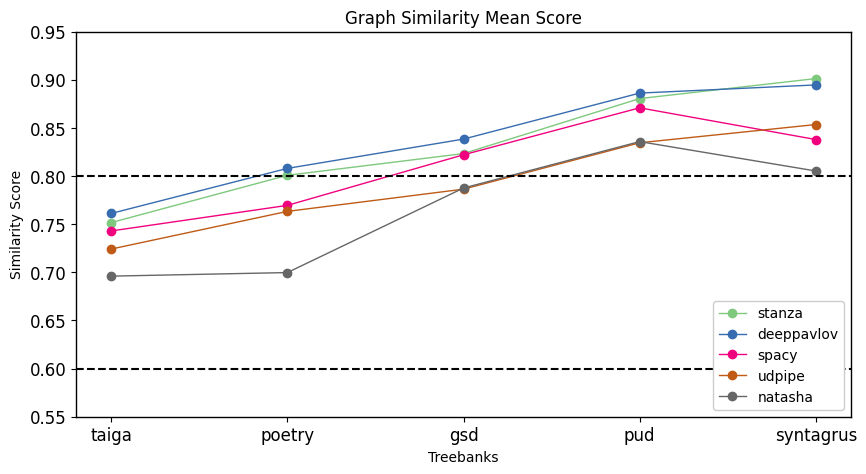

In [90]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

def draw_similarity_values(ax, data, title="Graph Similarity Mean Score"):
    colors = colormaps['Accent'].colors
    colors = (colors[0],) + colors[4:]

    for parser_i, p in enumerate(parser_names[::-1]):
        values = [np.mean(data[p][t]) for t in treebank_names]
        ax.plot(treebank_names, values,
                color=colors[parser_i],
                label=p,
                marker='.',
                linewidth=1,
                markersize=12)

    ax.legend(loc='lower right', framealpha=1.0)
    ax.set_title(title)

    ax.axhline(y=0.6, color="black", linestyle="--")
    ax.axhline(y=0.8, color="black", linestyle="--")
    ax.set_ylim([0.55, 0.95])

    ax.set_xlabel("Treebanks")
    ax.set_ylabel("Similarity Score")

plt.figure(figsize=(10, 5))
ax = plt.gca()

draw_similarity_values(ax, similarity_results)

plt.show()

# Boxplots

In [50]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

In [69]:
def draw_hboxplot(ax_plot, data, p):
    b = ax_plot.boxplot(x=data, showfliers=False, showcaps=True, showmeans=True,
            meanprops={'color':'grey', 'linewidth': 4, 'linestyle':'solid'},
            medianprops={'color': 'black', 'linewidth': 3},
            vert=False, meanline=True, widths=0.3)
    ax_plot.set_xlim([-0.02, 1.2])
    ax_plot.get_yaxis().set_visible(False)
    c = b['caps'][0]._x[0]
    ax_plot.text(
          c,
          0.79,
          f'{c:.2}',
          horizontalalignment='center',
          fontsize=12,
      )

    u_q1 = data.quantile(0.25)
    ax_plot.text(
        u_q1,
        0.65,
        f'{u_q1:.2}',
        horizontalalignment='center',
        fontsize=12,
    )
    u_q2 = data.quantile(0.5)
    if u_q2 != 1.0:
      ax_plot.text(
        u_q2,
        0.5,
        f'{u_q2:.2}',
        horizontalalignment='center',
        fontsize=12,
        color='black'
      )
    u_q3 = data.quantile(0.75)
    if u_q3 != 1.0:
      ax_plot.text(
        u_q3,
        0.35,
        f'{u_q3:.2}',
        horizontalalignment='center',
        fontsize=12,
      )

    u_mean = data.mean()
    if u_mean != 1.0:
      ax_plot.text(
            u_mean,
            1.2,
            f'{u_mean:.2}',
            horizontalalignment='center',
            fontsize=12,
            color='black'
      )

In [85]:
def draw_hist(ax_plot, data):
      step = 0.2
      bins1 = [round(step * i, 1) for i in range(0, 6)] + [1.01]
      v_5 = ax_plot.hist(data, bins=bins1, color="white", edgecolor='black',
                         linewidth=0.4)
      for i, v in enumerate(v_5[0]):
        rate = round(v / len(data) * 100)
        if rate >= 5:
          if i == len(v_5[0]) - 1:
            text_color = 'black'
          else:
            text_color = 'black'
          ax_plot.text(i * step, v + len(data) / 20, f"{rate}%", color=text_color, size=12)
      step2 = 0.05
      max2 = 20
      bins2 = [round(step2 * i, 2) for i in range(0, max2 + 1)] + [1.01]
      v_20 = ax_plot.hist(data, bins=bins2, rwidth=0.8)
      v_20[2][-1].set_facecolor('black')
      ax_plot.set_ylim([0, len(data) * 0.85])
      ax_plot.set_xlim([-0.02, 1.2])
      xlabels = [round(0.2 * i, 2) for i in range(0, 6)]
      ax_plot.set_xticks(xlabels, xlabels, fontdict={'fontsize':12})

In [63]:
def draw_similarity_diagrams(similarity_data, file_title):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    matplotlib.rcParams['axes.linewidth'] = 1

    fig = plt.figure(figsize = (16,24))

    gs = gridspec.GridSpec(4 * len(treebank_names), len(parser_names), figure=fig,
                  wspace=0.1, hspace=0.5,
                  height_ratios=(0.01, 0.01,  0.09, 0.09) * len(treebank_names))

    for treebank_i, t in enumerate(treebank_names):
      ax_t = fig.add_subplot(gs[4 * treebank_i, :])
      ax_t.text(0.5, 0.8, t, va="top", ha="center", fontsize=24, weight="bold")
      if treebank_i != 0:
        ax_t.axhline(y=1, color='gray', lw=1)
      ax_t.axis('off')

      for parser_i, p in enumerate(parser_names):
          ax_tp = fig.add_subplot(gs[4 * treebank_i + 1, parser_i])
          ax_tp.text(0.5, 0.5, p, va="top", ha="center", fontsize=18)
          ax_tp.axis('off')

          ax_h = fig.add_subplot(gs[4 * treebank_i + 2, parser_i])
          if parser_i != 0:
              ax_h.get_yaxis().set_visible(False)
          # Используем similarity_data вместо align_uas_f
          draw_hist(ax_h, pd.Series(similarity_data[p][t]))

          ax_b = fig.add_subplot(gs[4 * treebank_i + 3, parser_i])
          # Используем similarity_data вместо align_uas_f
          draw_hboxplot(ax_b, pd.Series(similarity_data[p][t]), p)
          ax_b.get_xaxis().set_visible(False)
          ax_b.axis('off')

    plt.savefig(f"{file_title}.eps", format='eps', dpi=300, bbox_inches='tight')
    plt.savefig(f"{file_title}.jpg", format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

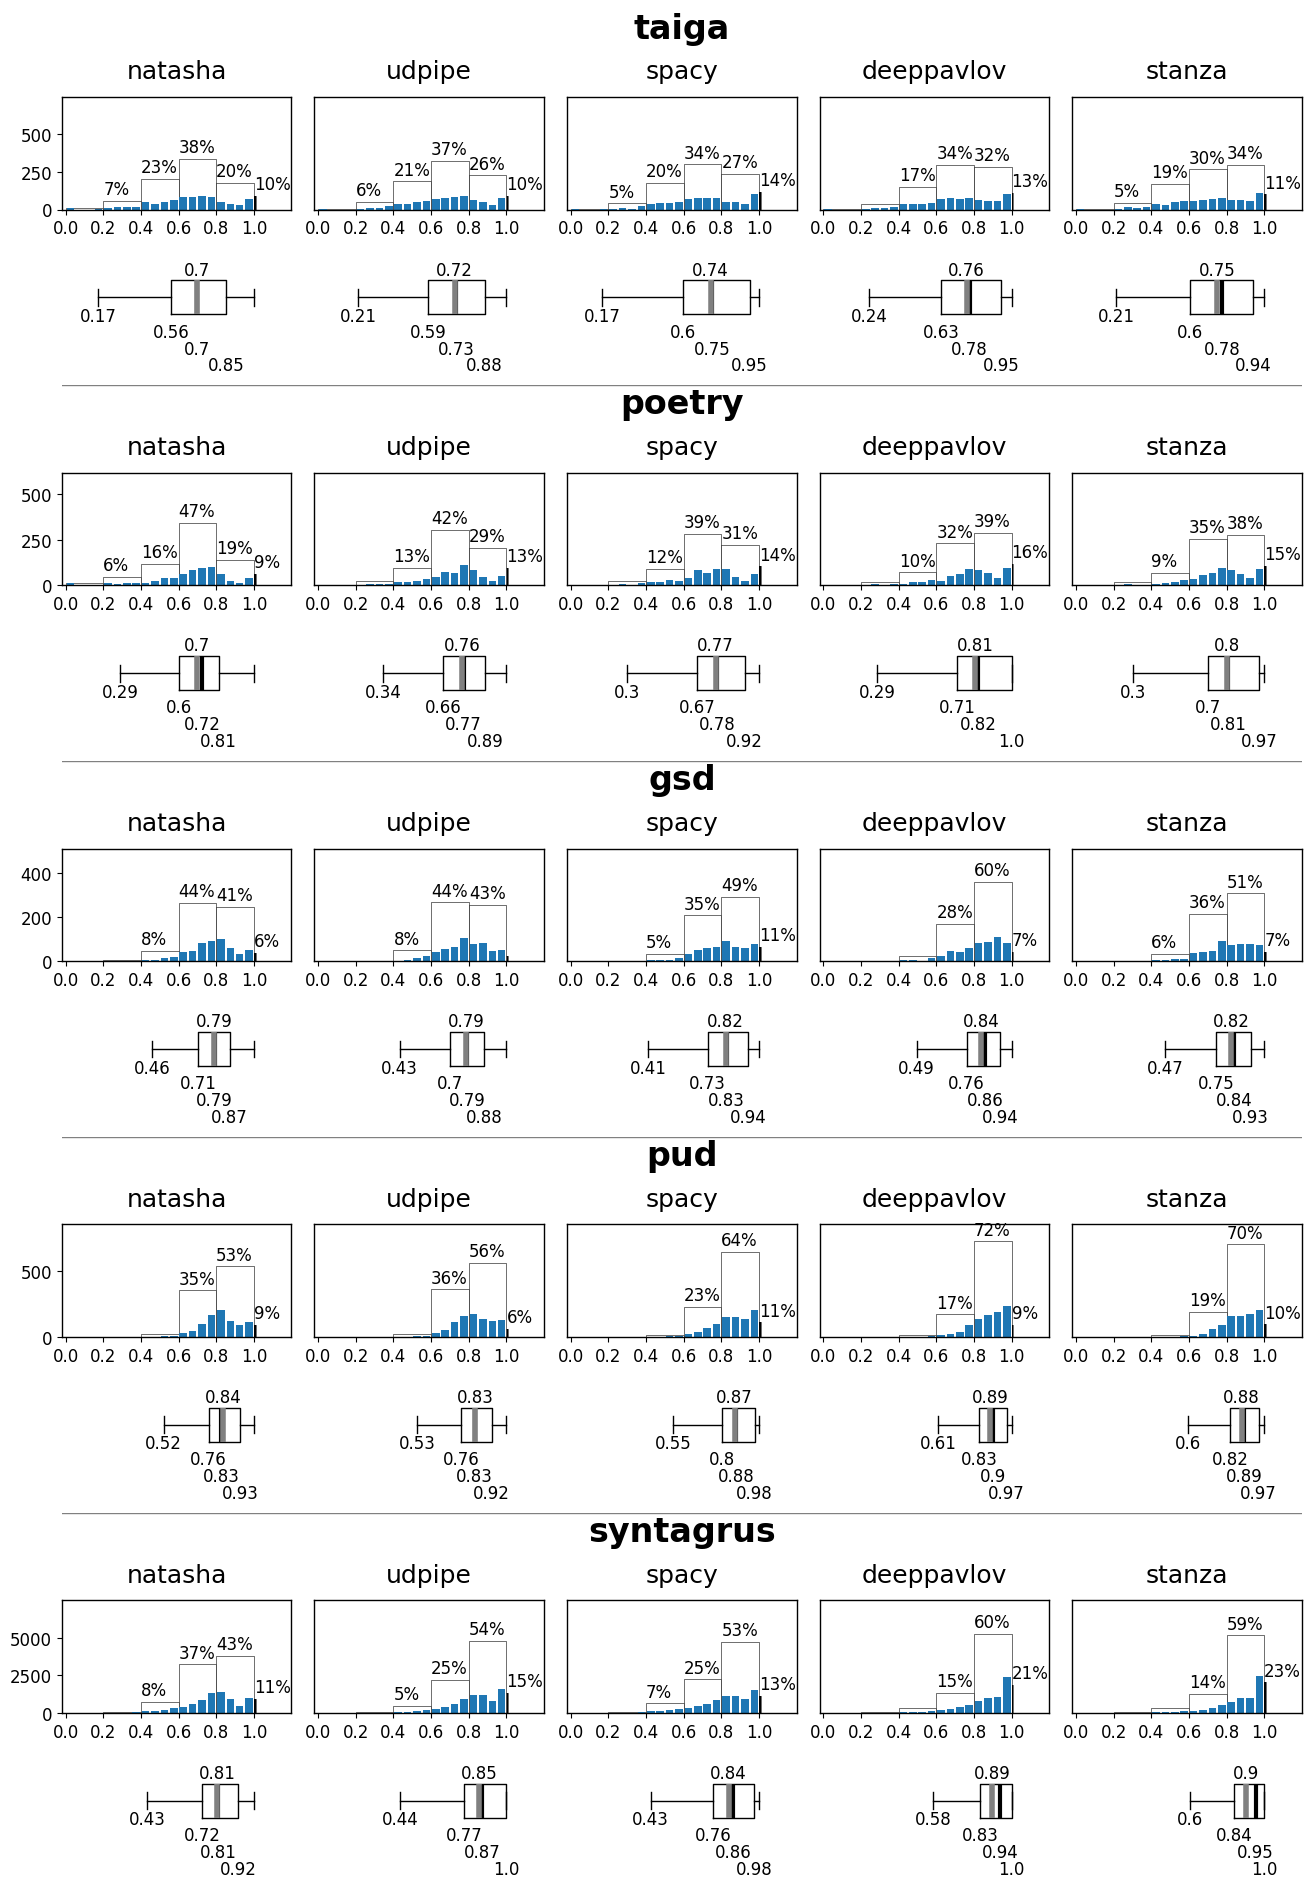

In [86]:
draw_similarity_diagrams(similarity_results, 'pics/graph_similarity')